In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics

In [4]:
import numpy as np

In [5]:
import pandas as pd
import os
import glob

In [135]:
one_train = pd.read_csv("three_train_combine.csv")
one_test = pd.read_csv("three_test_combine.csv")

In [136]:
one_train

,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,crest_horiz,...,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id
0,15369.0,-0.606,1.0,-0.035885,0.305700,0.595,0.301904,-0.020307,-0.203469,1.970825,...,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0
1,15379.0,0.283,1.0,-0.022923,0.311981,0.595,0.306780,-0.107927,-0.370114,1.939498,...,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0
2,15389.0,-0.085,1.0,-0.040731,0.301209,0.595,0.298155,-0.030118,-0.132409,1.995604,...,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0
3,15399.0,-0.216,1.0,-0.055154,0.300240,0.595,0.299531,0.104462,-0.093631,1.986440,...,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0
4,15409.0,0.588,1.0,-0.026231,0.324570,0.595,0.319346,0.131074,-0.325532,1.863181,...,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109563,1110999.0,1.143,1.0,0.087846,1.105386,2.234,1.087474,-0.029527,-0.402650,2.054302,...,117.851,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395,0.0,1.0
109564,1111009.0,-0.119,1.0,0.085962,1.105708,2.234,1.087638,-0.024119,-0.405813,2.053993,...,117.851,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395,0.0,1.0
109565,1111019.0,1.270,1.0,0.207692,1.051802,2.234,1.052081,-0.054590,-0.347843,2.123411,...,117.851,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395,0.0,1.0
109566,1111029.0,1.201,1.0,0.289192,1.043148,2.234,1.062986,-0.218546,-0.253512,2.101627,...,117.851,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395,0.0,1.0


In [137]:
one_train = one_train.reset_index()
one_test = one_test.reset_index()

### step 1 classification

In [138]:
imp_df = pd.read_csv("feature_selection_3.csv")

In [139]:
def three_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25,"time_group"] = 2
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [140]:
max_list = []
for i in range(1,int(one_train["id"].max())+1,1):
    one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
    one_id = one_id.reset_index()
    max_list.append(one_id.loc[0,"RUL_x"])

In [141]:
np.median(max_list)

4270.09961

In [142]:
one_test

,index,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,...,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id
0,0,19.0,0.375,1.0,-0.033000,0.576999,0.375,0.409332,0.000000,-2.000000,...,82.979,82.730999,0.019344,-1.213158,1.002998,1.003000,1.000002,1.002999,5140.1,1.0
1,1,29.0,-0.058,1.0,-0.041333,0.408255,0.375,0.335892,0.183402,-1.500000,...,82.979,82.730999,0.019344,-1.213158,1.002998,1.003000,1.000002,1.002999,5140.1,1.0
2,2,39.0,0.053,1.0,-0.017750,0.336659,0.375,0.292095,-0.261196,-1.065512,...,82.979,82.730999,0.019344,-1.213158,1.002998,1.003000,1.000002,1.002999,5140.1,1.0
3,3,49.0,0.721,1.0,0.130000,0.440630,0.721,0.414999,0.135693,-1.066885,...,82.979,82.730999,0.019344,-1.213158,1.002998,1.003000,1.000002,1.002999,5140.1,1.0
4,4,59.0,-0.376,1.0,0.045667,0.444968,0.721,0.408757,0.518844,-1.116908,...,82.979,82.730999,0.019344,-1.213158,1.002998,1.003000,1.000002,1.002999,5140.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131834,131834,1318359.0,0.749,1.0,0.037846,0.870040,1.986,0.853983,0.378753,-0.313019,...,107.983,107.854453,0.404532,-1.166452,1.001192,1.001192,1.000000,1.001192,0.0,1.0
131835,131835,1318369.0,-0.026,1.0,0.044231,0.868894,1.986,0.853168,0.357157,-0.309434,...,107.983,107.854453,0.404532,-1.166452,1.001192,1.001192,1.000000,1.001192,0.0,1.0
131836,131836,1318379.0,0.315,1.0,0.027962,0.859291,1.986,0.843068,0.409356,-0.176874,...,107.983,107.854453,0.404532,-1.166452,1.001192,1.001192,1.000000,1.001192,0.0,1.0
131837,131837,1318389.0,0.207,1.0,0.017731,0.855355,1.986,0.838932,0.448202,-0.107825,...,107.983,107.854453,0.404532,-1.166452,1.001192,1.001192,1.000000,1.001192,0.0,1.0


In [143]:
time_list = []
for i in range(1,int(one_train["id"].max())+1,1):
    one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
    one_id = one_id.reset_index()
    print(one_id.loc[0,"RUL_x"])

4270.09961


In [144]:
time_list = []
for i in range(1,int(one_test["id"].max())+1,1):
    one_id = one_test[one_test["id"]==i][["id","RUL_x"]]
    one_id = one_id.reset_index()
    print(one_id.loc[0,"RUL_x"])

5140.09922


In [145]:
def add_time(one_train):
    time_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id["time"] = one_id.loc[0,"RUL_x"] - one_id["RUL_x"] 
        time_list = time_list + list(one_id["time"].values)
    one_train["time"] = time_list
    return one_train

In [146]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [148]:
one_train = three_time_group(one_train)
one_test = three_time_group(one_test)

In [149]:
one_train = add_time(one_train)
one_test = add_time(one_test)

In [163]:
one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [48]:
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

# one_train = clean_dataset(one_train)
# one_test = clean_dataset(one_test)

In [213]:
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

In [214]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [215]:
X_train

,peak_temp,av_sum,Rtd sensor,sd_vert,sd_temp,sd_sum,sd_horiz,rms_sum,rms_horiz,peak_sum,...,f40,f32_vert,f24_vert,f16_sum,f144,f128,f112,crest_temp,crest_sum,av_horiz
0,63.744,0.382868,63.744,0.329475,0.070772,0.227335,0.305700,0.443036,0.301904,1.029354,...,0.077771,0.037851,0.001678,0.045784,0.225287,0.202532,0.180507,1.001630,2.323408,-0.035885
1,63.744,0.389624,63.744,0.329216,0.070772,0.221357,0.311981,0.446006,0.306780,1.029354,...,0.069022,0.035937,0.005140,0.043711,0.220526,0.188641,0.149239,1.001630,2.307938,-0.022923
2,63.744,0.388288,63.744,0.336562,0.070772,0.221202,0.301209,0.444765,0.298155,1.029354,...,0.061831,0.034205,0.009116,0.041706,0.185214,0.116175,0.092771,1.001630,2.314377,-0.040731
3,63.744,0.358454,63.744,0.265920,0.070772,0.179697,0.300240,0.399422,0.299531,0.638780,...,0.056267,0.032812,0.012941,0.039786,0.170410,0.041737,0.057095,1.001630,1.599260,-0.055154
4,63.744,0.363722,63.744,0.248298,0.070772,0.184570,0.324570,0.406263,0.319346,0.638780,...,0.052195,0.031884,0.016561,0.037965,0.162446,0.063865,0.053885,1.001630,1.572332,-0.026231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109563,117.851,2.095154,117.851,2.155015,0.025609,1.146869,1.105386,2.377896,1.087474,4.708376,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000395,1.980060,0.087846
109564,117.851,2.060982,117.851,2.135294,0.025609,1.177169,1.105708,2.362218,1.087638,4.708376,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000395,1.993201,0.085962
109565,117.851,2.046765,117.851,2.139804,0.025609,1.178542,1.051802,2.350487,1.052081,4.708376,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000395,2.003149,0.207692
109566,117.851,2.035136,117.851,2.123843,0.025609,1.184865,1.043148,2.343435,1.062986,4.708376,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000395,2.009177,0.289192


In [216]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [217]:
from sklearn.metrics import mean_squared_error

In [218]:
def plot_features_weights(model, weights, feature_names):
    

    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W_df = W.sort_values(by='Weights', ascending=True)
    W_df.tail(10).plot(kind='barh', color='r', figsize=(px,py))
    plt.xlabel(model)
    plt.gca().legend_ = None

In [219]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    plt.figure(figsize=(20,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=y_train.max()+50, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [220]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [223]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=100,min_samples_split=1000,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [224]:
from sklearn.tree import DecisionTreeClassifier

In [225]:
rf = DecisionTreeClassifier(max_depth=9)
rf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [226]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.998, accuracy testing: 0.500
F1 training: 0.998, F1 testing: 0.333


In [227]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.998, accuracy testing: 0.500
F1 training: 0.998, F1 testing: 0.333


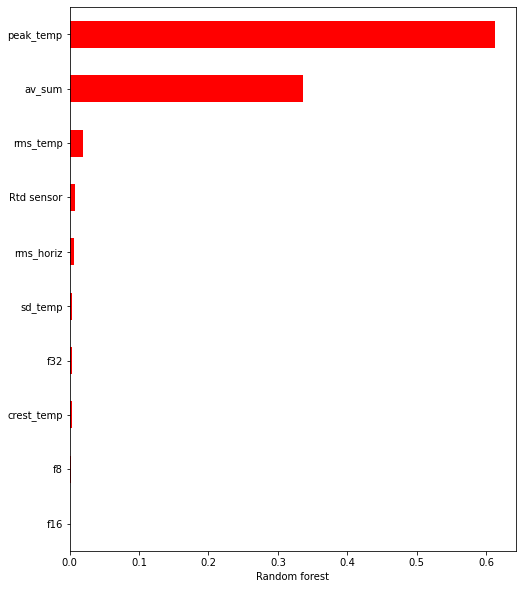

In [228]:
plot_features_weights('Random forest',rf.feature_importances_, X_train.columns)

In [229]:
ans_train = pd.DataFrame(y_train.values,columns=["real group"])
ans_train["pre_group(no time)"] = y_train_predict
ans_train["real_rul"] = one_train["RUL_x"]

In [230]:
ans_test = pd.DataFrame(y_test.values,columns=["real group"])
ans_test["pre_group(no time)"] = y_test_predict
ans_test["real_rul"] = one_test["RUL_x"]

In [231]:
ans_train["time"] = one_train["time"]
ans_test["time"] = one_test["time"]

### 加入時間因素考量time group

In [232]:
from sklearn.linear_model import LogisticRegression

In [233]:
X_train = ans_train[["pre_group(no time)","time"]]
y_train = ans_train["real group"]
X_test = ans_test[["pre_group(no time)","time"]]
y_test = ans_test["real group"]

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [242]:
X_test = X_test.fillna(method="ffill")

In [243]:
y_test_predict = dt.predict(X_test)
y_train_predict = dt.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 1.000, accuracy testing: 0.789
F1 training: 1.000, F1 testing: 0.789


In [244]:
from sklearn import tree

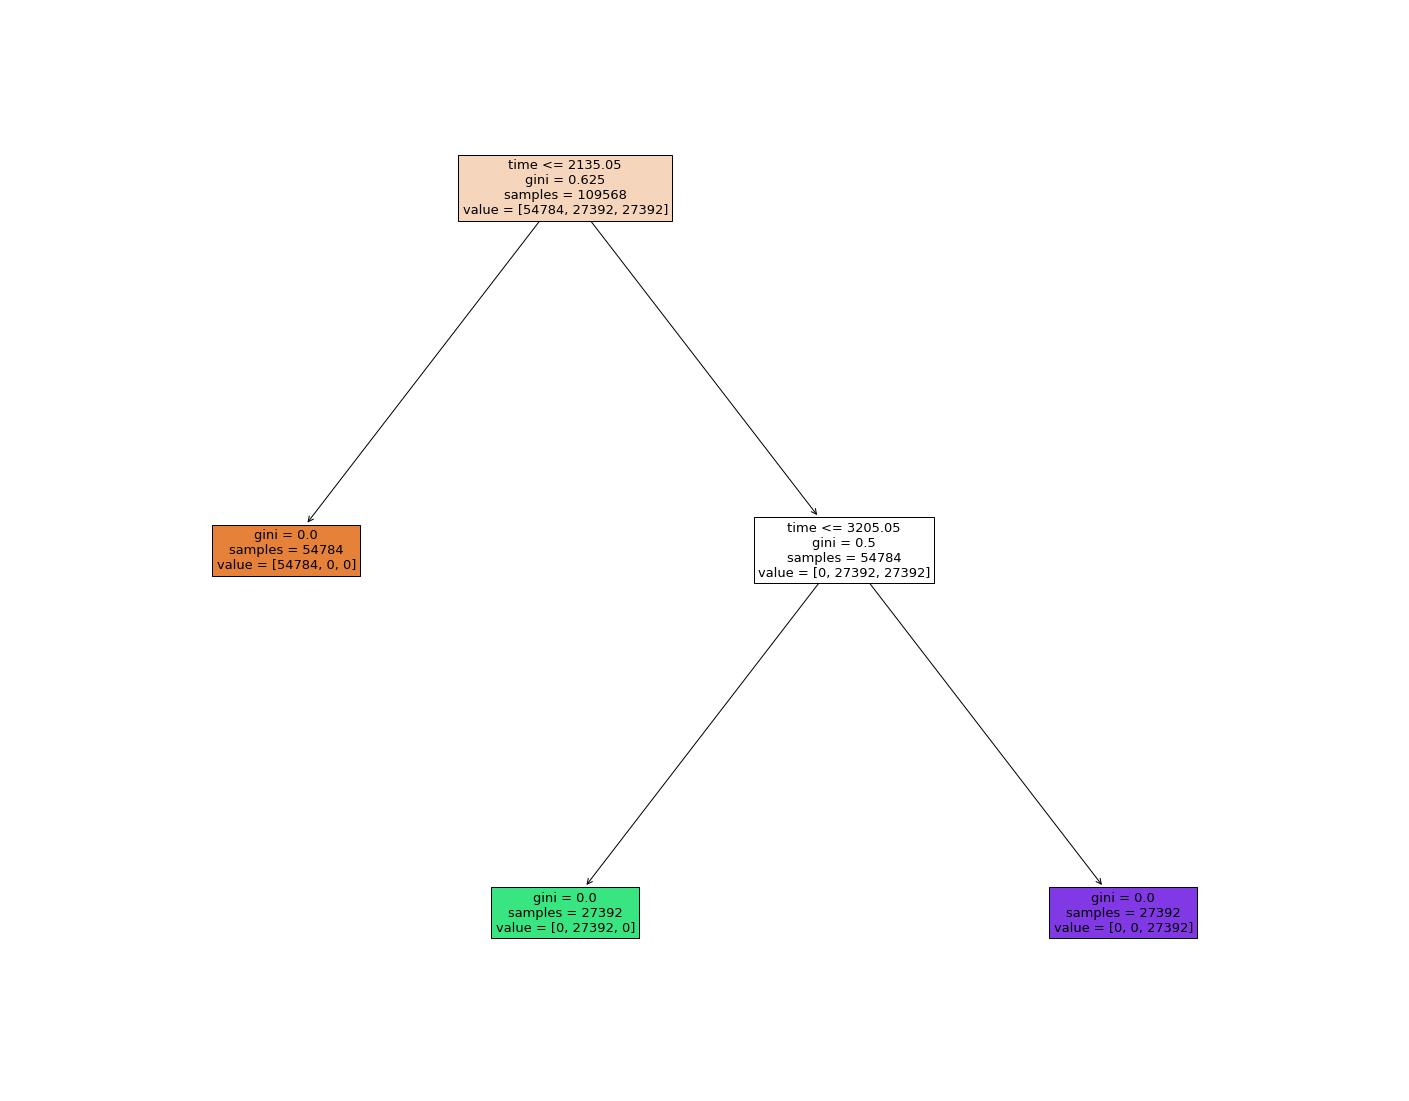

In [245]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns,
                   fontsize=13,
                   filled=True)

In [246]:
ans_train["pre_group(time)"] = y_train_predict
ans_test["pre_group(time)"] = y_test_predict

### step 2 train each class

#### 1. class 0

In [247]:
X_train = one_train[one_train["time_group"]==0].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test[one_test["time_group"]==0].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train[one_train["time_group"]==0]["RUL_x"]
y_test = one_test[one_test["time_group"]==0]["RUL_x"]

In [248]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [249]:
X_train.columns

Index(['peak_temp', 'av_sum', 'Rtd sensor', 'sd_vert', 'sd_temp', 'sd_sum',
       'sd_horiz', 'rms_sum', 'rms_horiz', 'peak_sum', 'f8', 'f16_vert',
       'av_temp', 'skew_temp', 'rms_vert', 'rms_temp', 'kurt_temp', 'f8_vert',
       'f40_vert', 'f40_sum', 'f32', 'f24', 'f16', 'clear_temp', 'peak_vert',
       'imp_temp', 'f96_vert', 'f96_sum', 'f8_sum', 'f88_vert', 'f88_sum',
       'f88', 'f80_vert', 'f80', 'f64', 'f48_vert', 'f40', 'f32_vert',
       'f24_vert', 'f16_sum', 'f144', 'f128', 'f112', 'crest_temp',
       'crest_sum', 'av_horiz'],
      dtype='object')

In [250]:
from lightgbm import LGBMRegressor

In [251]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [252]:
from sklearn.metrics import mean_absolute_error

In [253]:
y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 5677.701, MSE testing: 305147.672
RMSE training: 75.351, RMSE testing: 552.402
MAE training: 65.168, MAE testing: 454.826


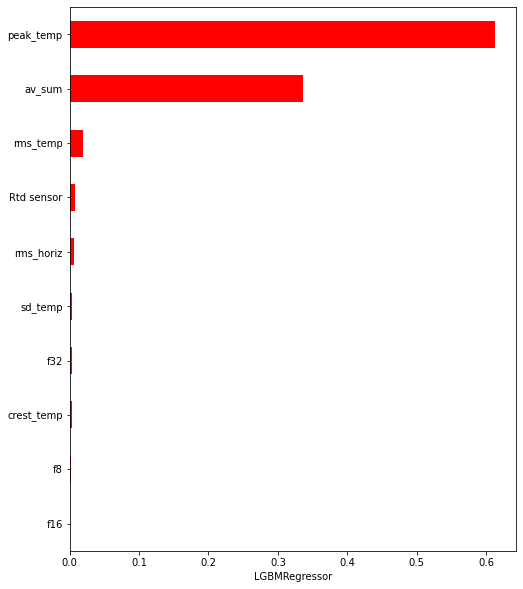

In [254]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [255]:
X_real_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)
X_real_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)

In [256]:
X_real_train = X_real_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_real_test = X_real_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [257]:
y_test_predict_all = lgb.predict(X_real_test)
y_train_predict_all = lgb.predict(X_real_train)

In [258]:
ans_train

,real group,pre_group(no time),real_rul,time,pre_group(time)
0,0.0,0.0,4270.09961,0.00000,0.0
1,0.0,0.0,4270.09922,0.00039,0.0
2,0.0,0.0,4270.09883,0.00078,0.0
3,0.0,0.0,4270.09844,0.00117,0.0
4,0.0,0.0,4270.09805,0.00156,0.0
...,...,...,...,...,...
109563,2.0,2.0,0.00156,4270.09805,2.0
109564,2.0,2.0,0.00117,4270.09844,2.0
109565,2.0,2.0,0.00078,4270.09883,2.0
109566,2.0,2.0,0.00039,4270.09922,2.0


In [261]:
ans_train["class 0 predict"] = y_train_predict_all
ans_test["class 0 predict"] = y_test_predict_all

#### 2. class 1

In [262]:
X_train = one_train[one_train["time_group"]==1].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test[one_test["time_group"]==1].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train[one_train["time_group"]==1]["RUL_x"]
y_test = one_test[one_test["time_group"]==1]["RUL_x"]

In [263]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [264]:
X_train.columns

Index(['peak_temp', 'av_sum', 'Rtd sensor', 'sd_vert', 'sd_temp', 'sd_sum',
       'sd_horiz', 'rms_sum', 'rms_horiz', 'peak_sum', 'f8', 'f16_vert',
       'av_temp', 'skew_temp', 'rms_vert', 'rms_temp', 'kurt_temp', 'f8_vert',
       'f40_vert', 'f40_sum', 'f32', 'f24', 'f16', 'clear_temp', 'peak_vert',
       'imp_temp', 'f96_vert', 'f96_sum', 'f8_sum', 'f88_vert', 'f88_sum',
       'f88', 'f80_vert', 'f80', 'f64', 'f48_vert', 'f40', 'f32_vert',
       'f24_vert', 'f16_sum', 'f144', 'f128', 'f112', 'crest_temp',
       'crest_sum', 'av_horiz'],
      dtype='object')

In [265]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [266]:
y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 1431.961, MSE testing: 154664.835
RMSE training: 37.841, RMSE testing: 393.275
MAE training: 32.626, MAE testing: 334.526


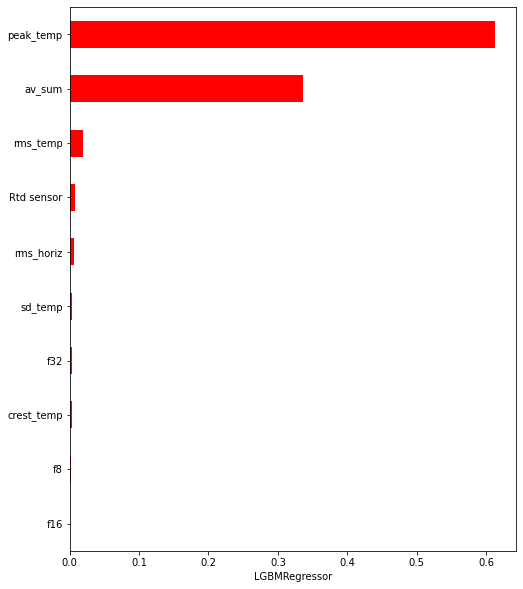

In [267]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [268]:
X_real_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)
X_real_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)

X_real_train = X_real_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_real_test = X_real_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

y_test_predict_all = lgb.predict(X_real_test)
y_train_predict_all = lgb.predict(X_real_train)

ans_train["class 1 predict"] = y_train_predict_all
ans_test["class 1 predict"] = y_test_predict_all

#### 3. class 2

In [269]:
X_train = one_train[one_train["time_group"]==2].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test[one_test["time_group"]==2].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train[one_train["time_group"]==2]["RUL_x"]
y_test = one_test[one_test["time_group"]==2]["RUL_x"]

In [270]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_train.columns

Index(['peak_temp', 'av_sum', 'Rtd sensor', 'sd_vert', 'sd_temp', 'sd_sum',
       'sd_horiz', 'rms_sum', 'rms_horiz', 'peak_sum', 'f8', 'f16_vert',
       'av_temp', 'skew_temp', 'rms_vert', 'rms_temp', 'kurt_temp', 'f8_vert',
       'f40_vert', 'f40_sum', 'f32', 'f24', 'f16', 'clear_temp', 'peak_vert',
       'imp_temp', 'f96_vert', 'f96_sum', 'f8_sum', 'f88_vert', 'f88_sum',
       'f88', 'f80_vert', 'f80', 'f64', 'f48_vert', 'f40', 'f32_vert',
       'f24_vert', 'f16_sum', 'f144', 'f128', 'f112', 'crest_temp',
       'crest_sum', 'av_horiz'],
      dtype='object')

In [271]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)
y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

In [272]:
train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 1529.195, MSE testing: 189826.229
RMSE training: 39.105, RMSE testing: 435.691
MAE training: 33.175, MAE testing: 361.330


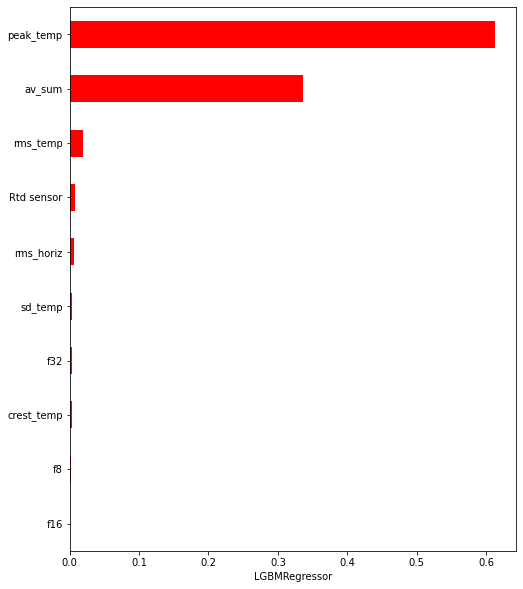

In [273]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [274]:
X_real_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)
X_real_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)

X_real_train = X_real_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_real_test = X_real_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

y_test_predict_all = lgb.predict(X_real_test)
y_train_predict_all = lgb.predict(X_real_train)

ans_train["class 2 predict"] = y_train_predict_all
ans_test["class 2 predict"] = y_test_predict_all

In [275]:
ans_train

,real group,pre_group(no time),real_rul,time,pre_group(time),class 0 predict,class 1 predict,class 2 predict
0,0.0,0.0,4270.09961,0.00000,0.0,4127.630675,2058.180919,839.958186
1,0.0,0.0,4270.09922,0.00039,0.0,4127.630675,2058.180919,839.958186
2,0.0,0.0,4270.09883,0.00078,0.0,4127.630675,2058.180919,839.958186
3,0.0,0.0,4270.09844,0.00117,0.0,4127.630675,2058.180919,839.958186
4,0.0,0.0,4270.09805,0.00156,0.0,4127.630675,2058.180919,839.958186
...,...,...,...,...,...,...,...,...
109563,2.0,2.0,0.00156,4270.09805,2.0,2282.402450,1140.180760,76.288239
109564,2.0,2.0,0.00117,4270.09844,2.0,2282.402450,1140.180760,76.288239
109565,2.0,2.0,0.00078,4270.09883,2.0,2282.402450,1140.180760,76.288239
109566,2.0,2.0,0.00039,4270.09922,2.0,2282.402450,1140.180760,76.288239


In [276]:
ans_train = ans_train.reset_index()
ans_test = ans_test.reset_index()

In [277]:
ans_train.loc[ans_train["pre_group(no time)"]==0,"final predict"] = ans_train.loc[ans_train["pre_group(no time)"]==0,"class 0 predict"]
ans_train.loc[ans_train["pre_group(no time)"]==1,"final predict"] = ans_train.loc[ans_train["pre_group(no time)"]==1,"class 1 predict"]
ans_train.loc[ans_train["pre_group(no time)"]==2,"final predict"] = ans_train.loc[ans_train["pre_group(no time)"]==2,"class 2 predict"]

In [278]:
ans_test.loc[ans_test["pre_group(no time)"]==0,"final predict"] = ans_test.loc[ans_test["pre_group(no time)"]==0,"class 0 predict"]
ans_test.loc[ans_test["pre_group(no time)"]==1,"final predict"] = ans_test.loc[ans_test["pre_group(no time)"]==1,"class 1 predict"]
ans_test.loc[ans_test["pre_group(no time)"]==2,"final predict"] = ans_test.loc[ans_test["pre_group(no time)"]==2,"class 2 predict"]

In [279]:
ans_train

,index,real group,pre_group(no time),real_rul,time,pre_group(time),class 0 predict,class 1 predict,class 2 predict,final predict
0,0,0.0,0.0,4270.09961,0.00000,0.0,4127.630675,2058.180919,839.958186,4127.630675
1,1,0.0,0.0,4270.09922,0.00039,0.0,4127.630675,2058.180919,839.958186,4127.630675
2,2,0.0,0.0,4270.09883,0.00078,0.0,4127.630675,2058.180919,839.958186,4127.630675
3,3,0.0,0.0,4270.09844,0.00117,0.0,4127.630675,2058.180919,839.958186,4127.630675
4,4,0.0,0.0,4270.09805,0.00156,0.0,4127.630675,2058.180919,839.958186,4127.630675
...,...,...,...,...,...,...,...,...,...,...
109563,109563,2.0,2.0,0.00156,4270.09805,2.0,2282.402450,1140.180760,76.288239,76.288239
109564,109564,2.0,2.0,0.00117,4270.09844,2.0,2282.402450,1140.180760,76.288239,76.288239
109565,109565,2.0,2.0,0.00078,4270.09883,2.0,2282.402450,1140.180760,76.288239,76.288239
109566,109566,2.0,2.0,0.00039,4270.09922,2.0,2282.402450,1140.180760,76.288239,76.288239


In [280]:
ans_train.loc[ans_train["pre_group(time)"]==0,"final predict(time)"] = ans_train.loc[ans_train["pre_group(time)"]==0,"class 0 predict"]
ans_train.loc[ans_train["pre_group(time)"]==1,"final predict(time)"] = ans_train.loc[ans_train["pre_group(time)"]==1,"class 1 predict"]
ans_train.loc[ans_train["pre_group(time)"]==2,"final predict(time)"] = ans_train.loc[ans_train["pre_group(time)"]==2,"class 2 predict"]

In [281]:
ans_test.loc[ans_test["pre_group(time)"]==0,"final predict(time)"] = ans_test.loc[ans_test["pre_group(time)"]==0,"class 0 predict"]
ans_test.loc[ans_test["pre_group(time)"]==1,"final predict(time)"] = ans_test.loc[ans_test["pre_group(time)"]==1,"class 1 predict"]
ans_test.loc[ans_test["pre_group(time)"]==2,"final predict(time)"] = ans_test.loc[ans_test["pre_group(time)"]==2,"class 2 predict"]

In [284]:
ans_test = ans_test.fillna(method="ffill")

In [285]:
train_mse = mean_squared_error(ans_train["real_rul"], ans_train["final predict"])
test_mse = mean_squared_error(ans_test["real_rul"], ans_test["final predict"])
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(ans_train["real_rul"], ans_train["final predict"])
test_mape = mean_absolute_error(ans_test["real_rul"], ans_test["final predict"])
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 3785.057, MSE testing: 1975315.478
RMSE training: 61.523, RMSE testing: 1405.459
MAE training: 49.545, MAE testing: 1111.956


In [286]:
train_mse = mean_squared_error(ans_train["real_rul"], ans_train["final predict(time)"])
test_mse = mean_squared_error(ans_test["real_rul"], ans_test["final predict(time)"])
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(ans_train["real_rul"], ans_train["final predict(time)"])
test_mape = mean_absolute_error(ans_test["real_rul"], ans_test["final predict(time)"])
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 3579.140, MSE testing: 311851.724
RMSE training: 59.826, RMSE testing: 558.437
MAE training: 49.034, MAE testing: 463.676


In [287]:
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["RUL_x"]
y_test = one_test["RUL_x"]

X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

X_train.columns

Index(['peak_temp', 'av_sum', 'Rtd sensor', 'sd_vert', 'sd_temp', 'sd_sum',
       'sd_horiz', 'rms_sum', 'rms_horiz', 'peak_sum', 'f8', 'f16_vert',
       'av_temp', 'skew_temp', 'rms_vert', 'rms_temp', 'kurt_temp', 'f8_vert',
       'f40_vert', 'f40_sum', 'f32', 'f24', 'f16', 'clear_temp', 'peak_vert',
       'imp_temp', 'f96_vert', 'f96_sum', 'f8_sum', 'f88_vert', 'f88_sum',
       'f88', 'f80_vert', 'f80', 'f64', 'f48_vert', 'f40', 'f32_vert',
       'f24_vert', 'f16_sum', 'f144', 'f128', 'f112', 'crest_temp',
       'crest_sum', 'av_horiz'],
      dtype='object')

In [288]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)

y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 23570.222, MSE testing: 1798134.304
RMSE training: 153.526, RMSE testing: 1340.945
MAE training: 130.708, MAE testing: 1078.326


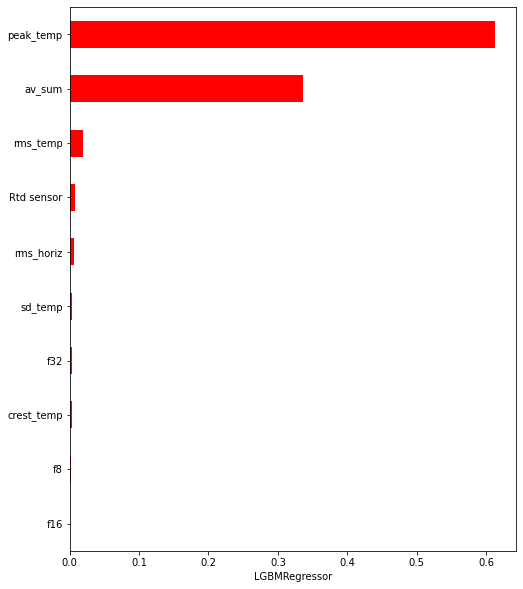

In [289]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [49]:
ans_df = pd.DataFrame(y_train)

In [50]:
ans_df["rf_predict"] = y_train_predict

In [67]:

train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 4385.278, MAE testing: 5756.707


In [73]:
y_train = ans_df[ans_df["RUL"]<500]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<500]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 1040.631, MAE testing: 5756.707


In [63]:
y_train = ans_df[ans_df["RUL"]<10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 3904.573, MAE testing: 5756.707


In [68]:
y_train = ans_df[ans_df["RUL"]>10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]>10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 4883.032, MAE testing: 5756.707


In [61]:
ans_df[ans_df["RUL"]>10000]

,RUL,rf_predict
0,28020.099605,15356.027831
1,28020.099214,15176.099507
2,28020.098824,16848.654019
3,28020.098433,16848.654019
4,28020.098042,15657.801022
...,...,...
543227,28072.201560,7309.972206
543228,28072.201170,7266.249676
543229,28072.200780,6636.463772
543230,28072.200390,6423.953280


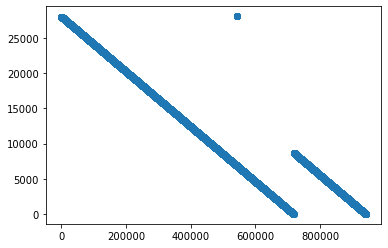

In [60]:
plt.scatter(ans_df.index,ans_df["RUL"])

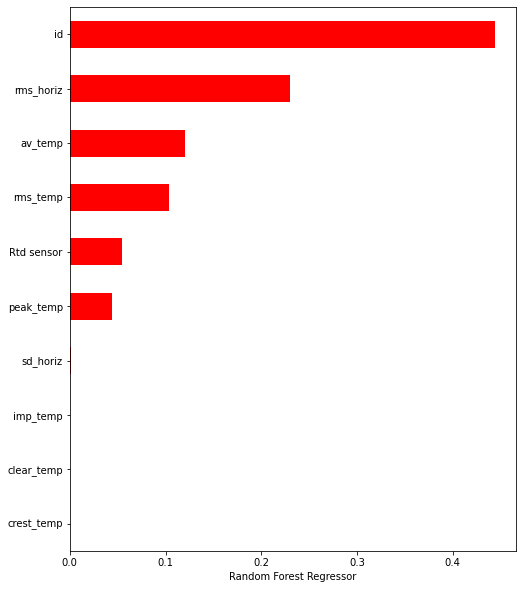

In [58]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns)

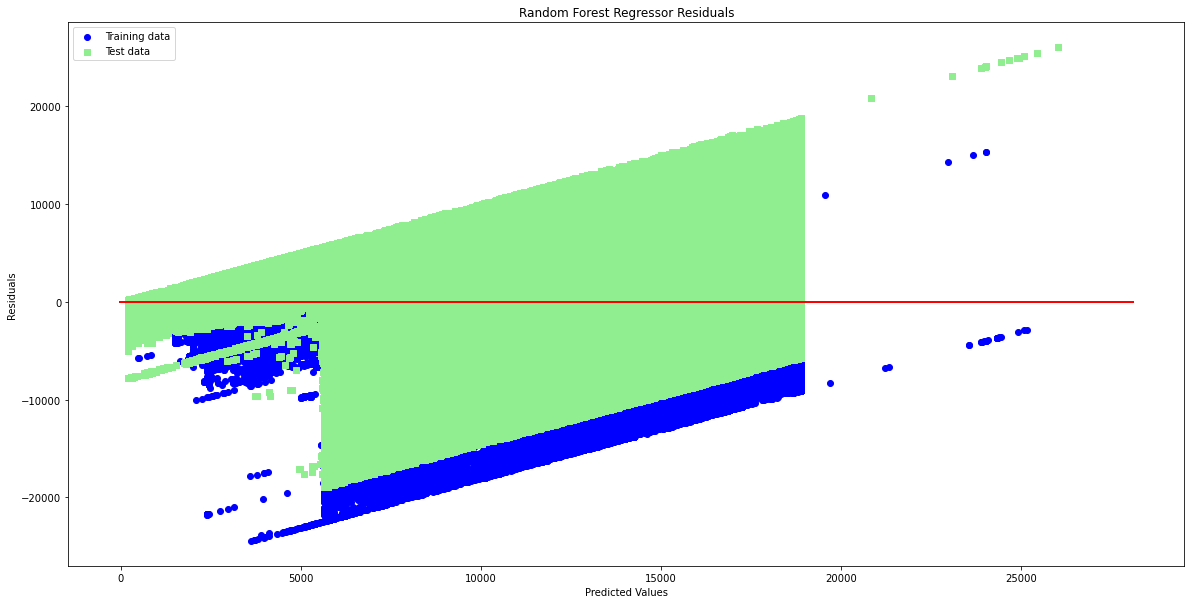

In [46]:
plot_residual('Random Forest Regressor',y_train, y_train_predict, y_test, y_test_predict)

In [150]:
y_train

0         28020.099605
1         28020.099214
2         28020.098824
3         28020.098433
4         28020.098042
              ...     
940538        0.001560
940539        0.001170
940540        0.000780
940541        0.000390
940542        0.000000
Name: RUL, Length: 940543, dtype: float64

In [149]:
y_train_predict 

array([15090.69924777, 14191.4132257 , 16939.07715585, ...,
         183.10801738,   183.10801738,   183.10801738])

In [ ]:
mean_absolute_percentage_error

In [36]:
X_train.isnull().values.any()

False

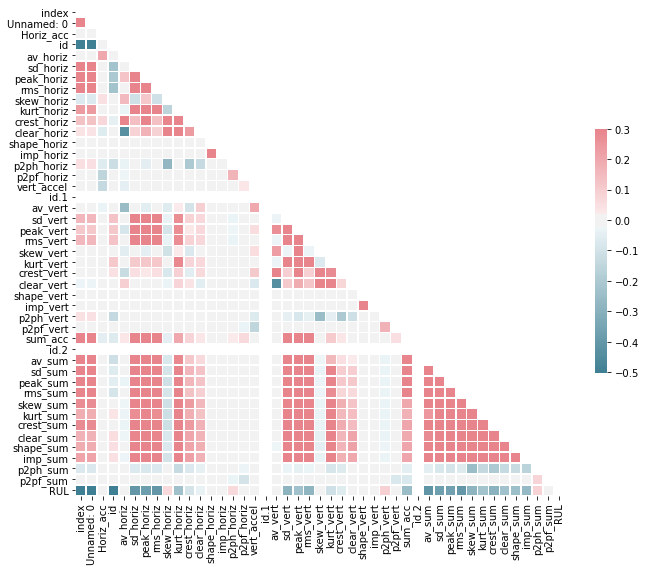

In [75]:
# 計算相關係數
corr = one_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

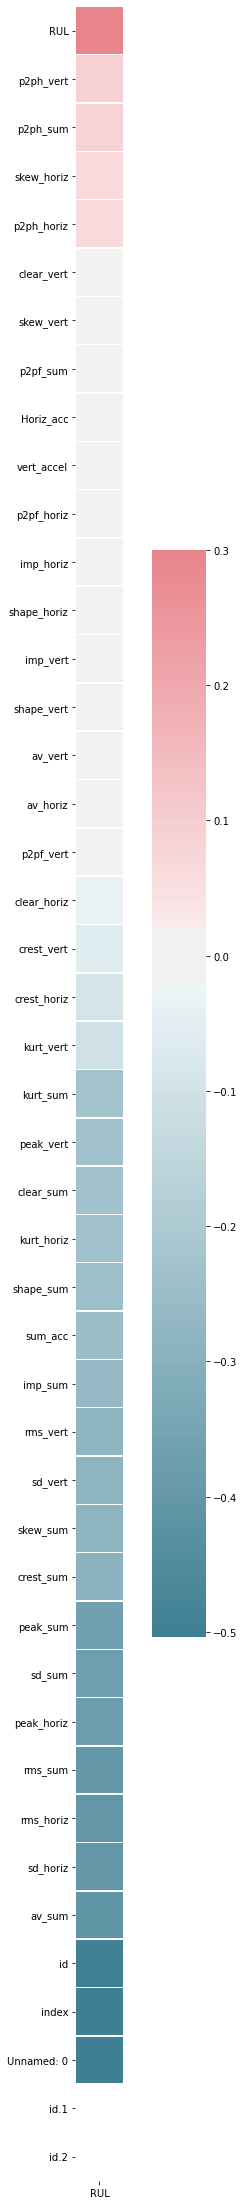

In [90]:
plt.figure(figsize=(10,40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pd.DataFrame(corr["RUL"].sort_values(ascending=False)), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

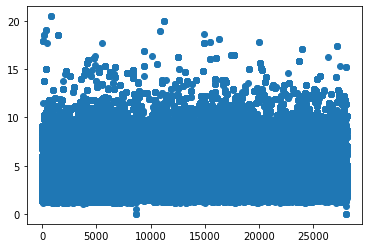

In [93]:
plt.scatter(one_train["RUL"],one_train["p2ph_vert"])

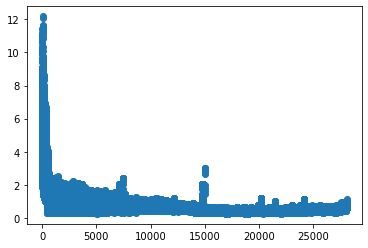

In [94]:
plt.scatter(one_train["RUL"],one_train["av_sum"])